# ML — Wine Quality (Clasificación)

**Autor:**  
Eliana Ordoñez Cansimance  
Luis Gerardo Restrepo Arredondo  
Dilmer Noriel Gutiérrez Montenegro  

**Fecha:** 2025-10-25  
**Random State:** 42  

---

### 📋 Este notebook incluye:
- **EDA**
- **Preprocesamiento** (ColumnTransformer)
- **Modelos de clasificación** (target: `quality_category` o `quality_label`)
- **Evaluación** con validación cruzada *(accuracy, F1 macro, F1 weighted)*



In [56]:
# Librerias y carga de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import StandardScaler

In [39]:
# Carga de datos

# Dataset de Clasificación
df_cls = pd.read_csv("data/wine_data_train_classification.csv")
print(df_cls.head())
print(f"Dataset Clasificación cargado: {df_cls.shape[0]} filas, {df_cls.shape[1]} columnas")

# Dataset de Regresión
df_reg = pd.read_csv("data/wine_data_train_regression.csv")
print(f"Dataset Regresión cargado: {df_reg.shape[0]} filas, {df_reg.shape[1]} columnas")

#información básica de los datasets
info_cls = pd.DataFrame({
    "Tipo de Dato": df_cls.dtypes,
    "Valores Nulos": df_cls.isnull().sum(),
    "Valores Únicos": df_cls.nunique(),
    "Valores No Nulos": df_cls.notnull().sum()
})

display(info_cls.style.background_gradient(cmap='Greens').set_caption("📋 Información General - Dataset Clasificación"))

info_reg = pd.DataFrame({
    "Tipo de Dato": df_reg.dtypes,
    "Valores Nulos": df_reg.isnull().sum(),
    "Valores Únicos": df_reg.nunique(),
    "Valores No Nulos": df_reg.notnull().sum()
})

display(info_reg.style.background_gradient(cmap='Oranges').set_caption("📋 Información General - Dataset Regresión"))




   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            6.4              0.31         0.26            13.2      0.046   
1            6.6              0.29         0.31             3.9      0.027   
2            6.8              0.30         0.23             4.6      0.061   
3            6.6              0.25         0.35            14.0      0.069   
4            7.5              0.24         0.31            13.1      0.050   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 57.0                 205.0  0.99750  3.17       0.41   
1                 39.0                  96.0  0.99035  3.24       0.60   
2                 50.5                 238.5  0.99580  3.32       0.60   
3                 42.0                 163.0  0.99900  3.56       0.47   
4                 26.0                 180.0  0.99884  3.05       0.53   

   alcohol   type quality_category  quality_label  
0      9.6  white           Medium

,Tipo de Dato,Valores Nulos,Valores Únicos,Valores No Nulos
fixed acidity,float64,0,105,5847
volatile acidity,float64,0,184,5847
citric acid,float64,0,88,5847
residual sugar,float64,0,307,5847
chlorides,float64,0,207,5847
free sulfur dioxide,float64,0,132,5847
total sulfur dioxide,float64,0,275,5847
density,float64,0,973,5847
pH,float64,0,107,5847
sulphates,float64,0,109,5847


,Tipo de Dato,Valores Nulos,Valores Únicos,Valores No Nulos
fixed acidity,float64,0,104,5847
volatile acidity,float64,0,184,5847
citric acid,float64,0,89,5847
residual sugar,float64,0,313,5847
chlorides,float64,0,204,5847
free sulfur dioxide,float64,0,131,5847
total sulfur dioxide,float64,0,271,5847
density,float64,0,973,5847
pH,float64,0,107,5847
sulphates,float64,0,107,5847


In [ ]:
print("\n=== NULOS Y DUPLICADOS ===")
nulos_cls = pd.DataFrame({
    "Valores Nulos": df_cls.isnull().sum(),
    "Duplicados": [df_cls.duplicated().sum()] * len(df_cls.columns)
})
display(
    nulos_cls.style
        .background_gradient(cmap='Greens')
        .set_caption("📋 Nulos y Duplicados - Dataset Clasificación")
)

nulos_reg = pd.DataFrame({
    "Valores Nulos": df_reg.isnull().sum(),
    "Duplicados": [df_reg.duplicated().sum()] * len(df_reg.columns)
})
display(
    nulos_reg.style
        .background_gradient(cmap='Oranges')
        .set_caption("📋 Nulos y Duplicados - Dataset Regresión")
)

print(f"---Duplicados Clasificación: {df_cls.duplicated().sum()}")
print(f"---Duplicados Regresión: {df_reg.duplicated().sum()}")



=== NULOS Y DUPLICADOS ===


,Valores Nulos,Duplicados
fixed acidity,0,970
volatile acidity,0,970
citric acid,0,970
residual sugar,0,970
chlorides,0,970
free sulfur dioxide,0,970
total sulfur dioxide,0,970
density,0,970
pH,0,970
sulphates,0,970


,Valores Nulos,Duplicados
fixed acidity,0,969
volatile acidity,0,969
citric acid,0,969
residual sugar,0,969
chlorides,0,969
free sulfur dioxide,0,969
total sulfur dioxide,0,969
density,0,969
pH,0,969
sulphates,0,969


---Duplicados Clasificación: 970
---Duplicados Regresión: 969



Descripción estadística del dataset de Clasificación:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    5847.000000       5847.000000  5847.000000     5847.000000   
mean        7.218616          0.339803     0.318659        5.465401   
std         1.299384          0.164542     0.144632        4.764590   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.200000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  5847.000000          5847.000000           5847.000000  5847.000000   
mean      0.056071            30.671969            116.291859     0.994704   
std       0.035622            17.872105             56.506500     0.003

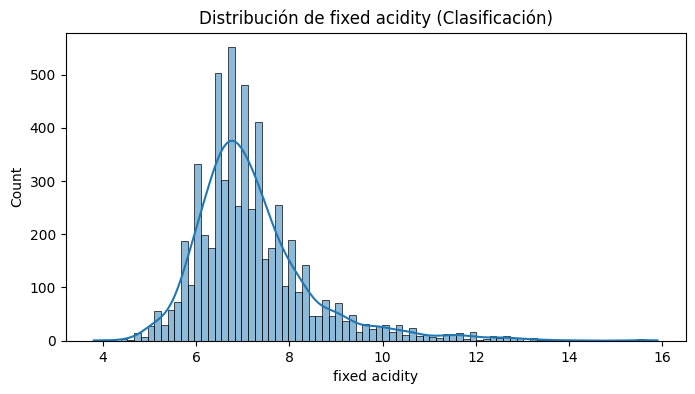

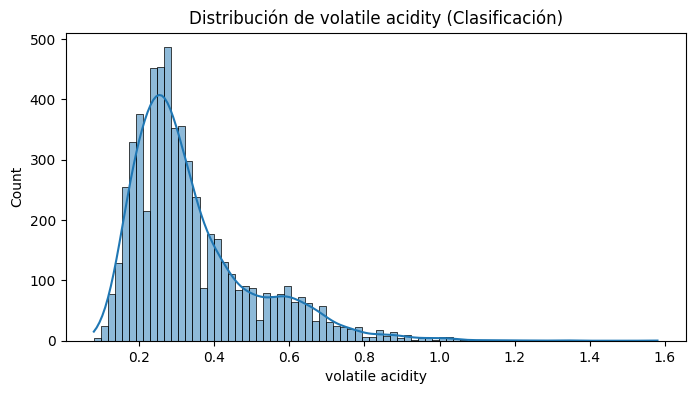

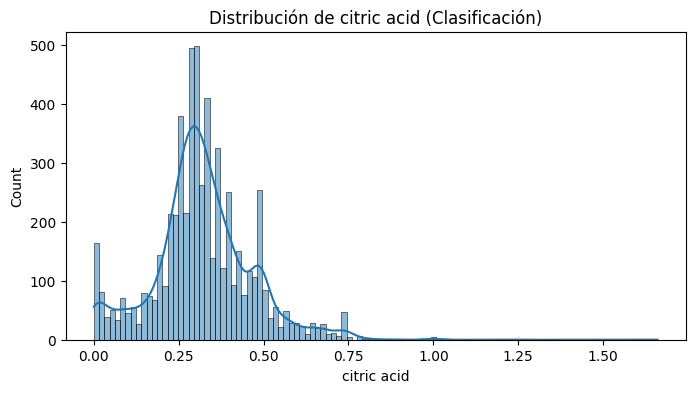

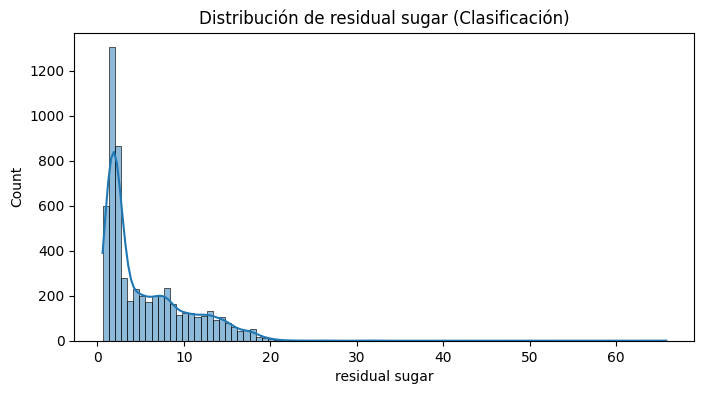

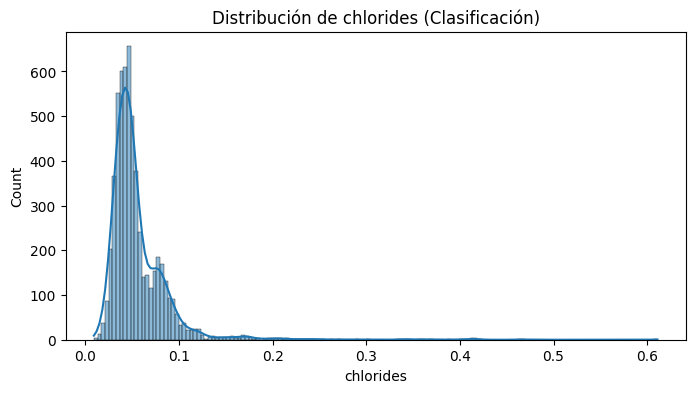

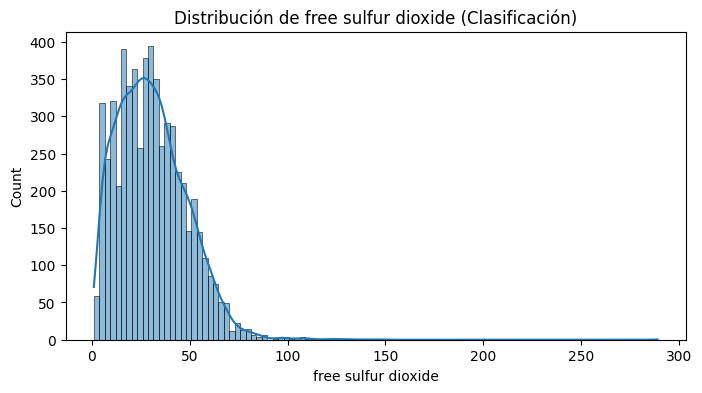

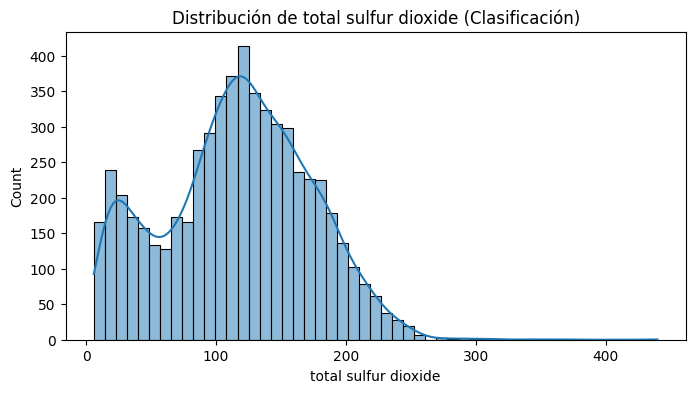

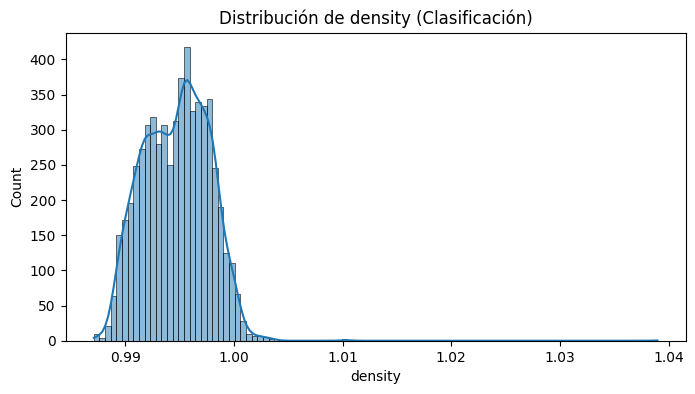

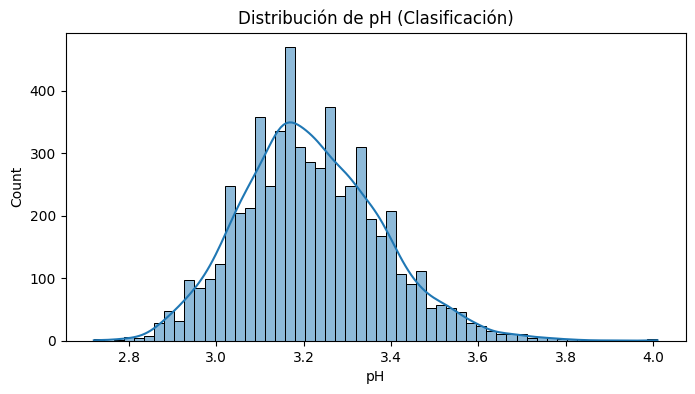

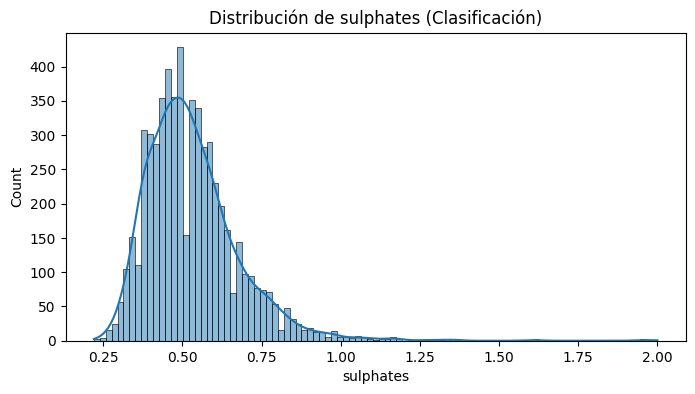

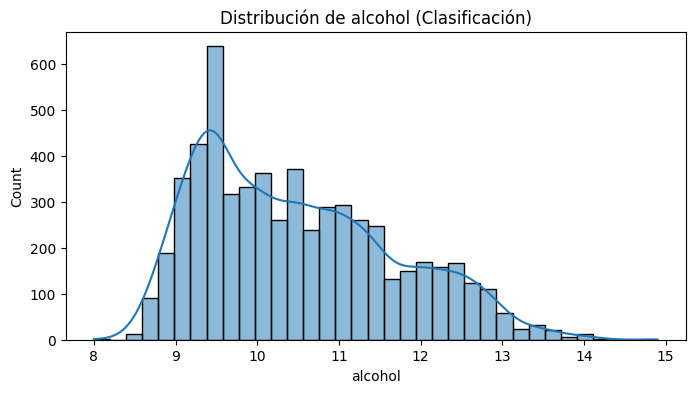

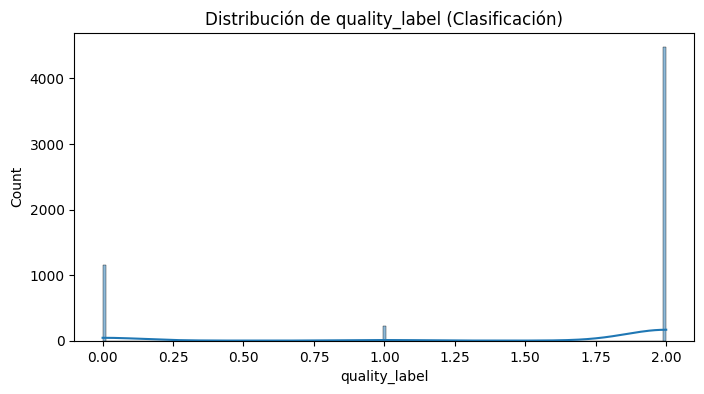

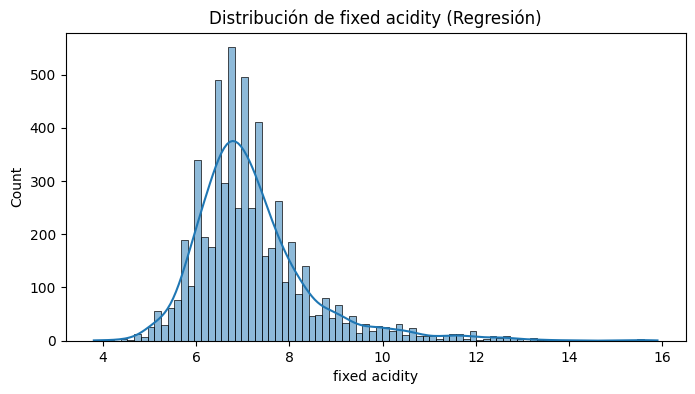

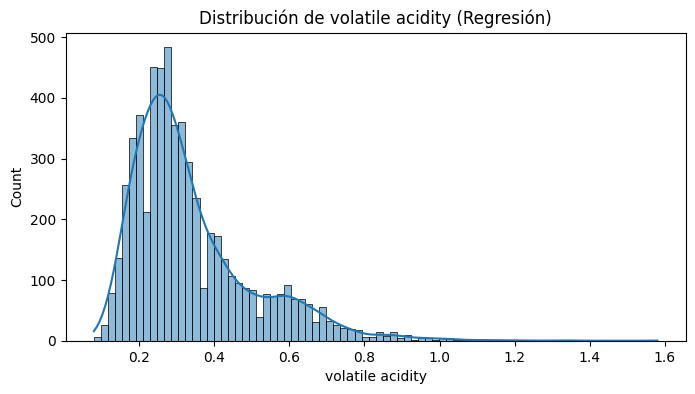

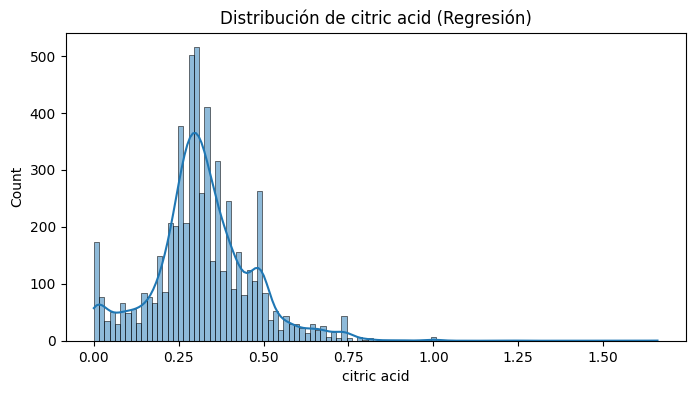

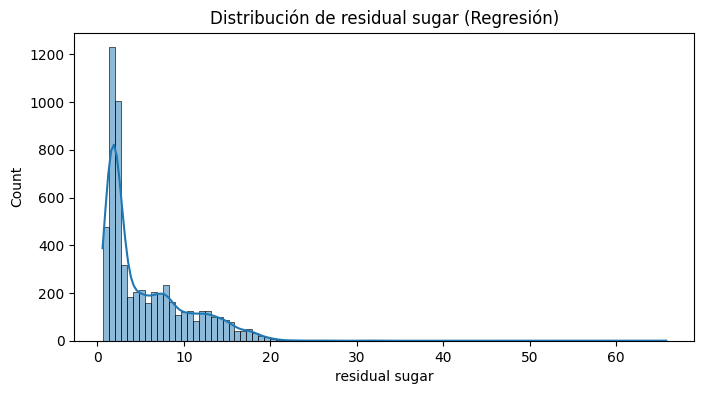

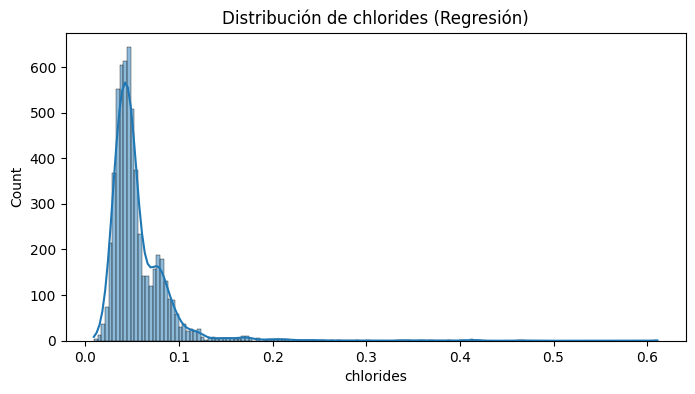

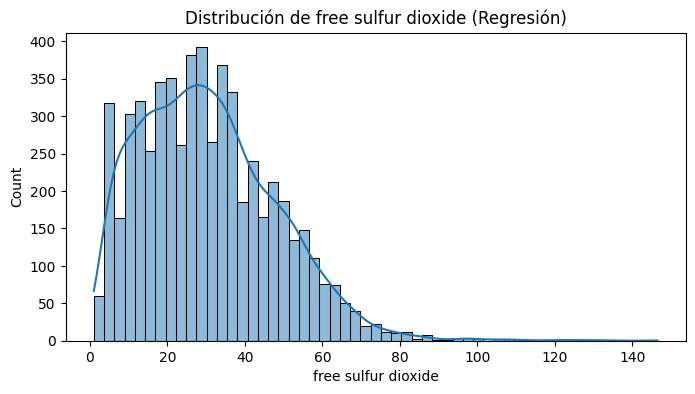

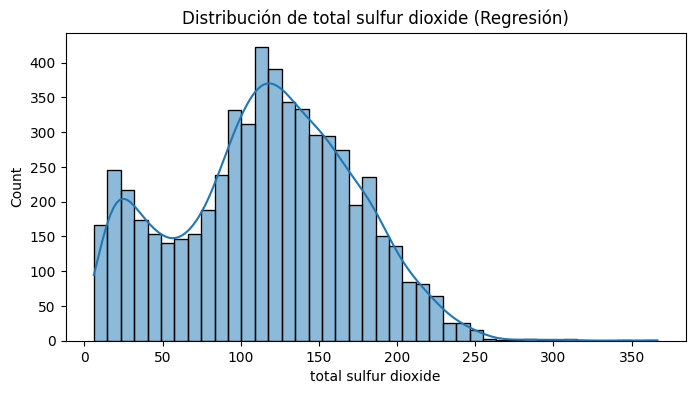

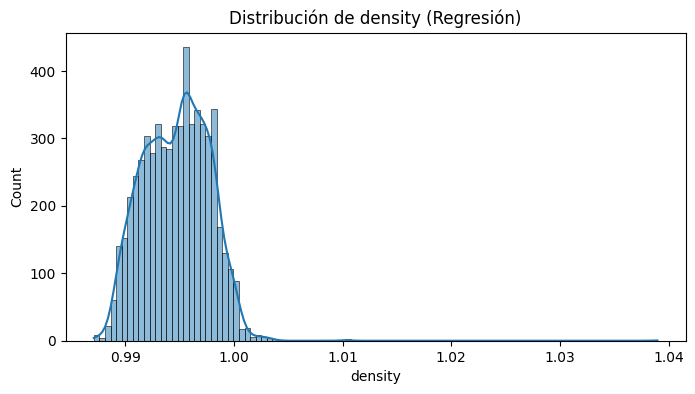

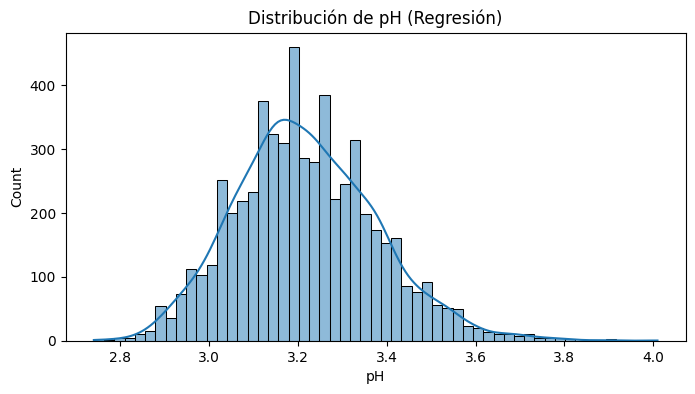

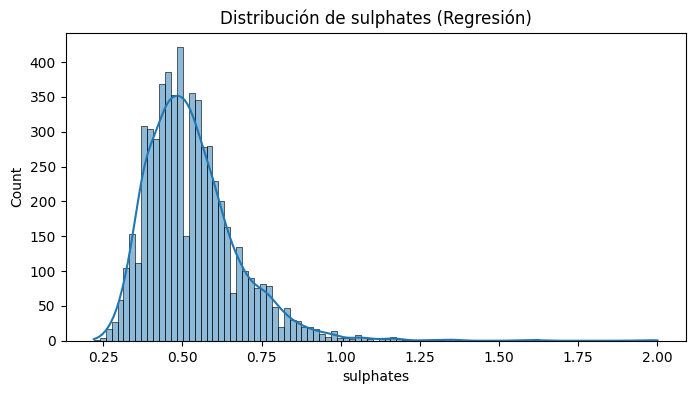

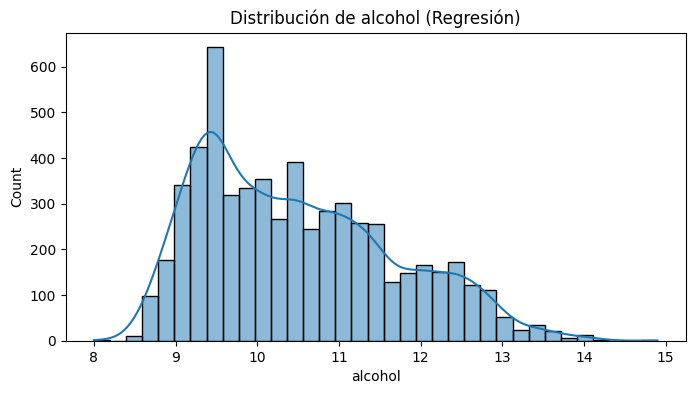

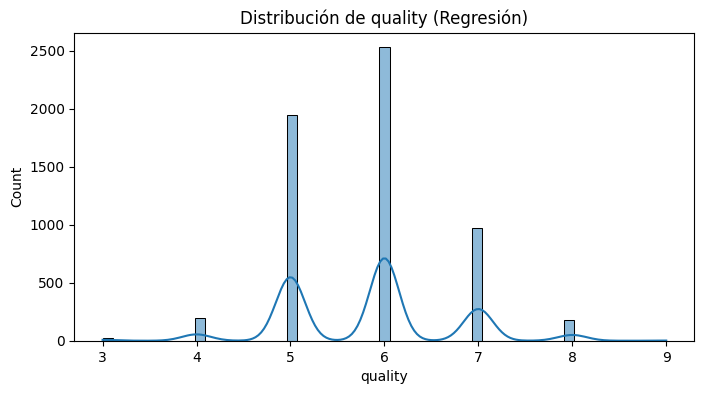

EDA Wines script loaded successfully.


In [ ]:

# Análisis estadístico descriptivo
print("\nDescripción estadística del dataset de Clasificación:")
print(df_cls.describe())    

print("\n Descripción estadística del dataset de Regresión:")
print(df_reg.describe())  

# Visualización de datos

# Identificación de outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    out = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
    return out.shape[0]

print("\n=== OUTLIERS DETECTADOS (Clasificación) ===")
for c in df_cls.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_cls, c)}")
    print("\n=== OUTLIERS DETECTADOS (Regresión) ===")
for c in df_reg.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_reg, c)}")

# Visualización de distribuciones de variables numéricas
num_cols_cls = df_cls.select_dtypes(include=[np.number]).columns
num_cols_reg = df_reg.select_dtypes(include=[np.number]).columns
for col in num_cols_cls:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cls[col], kde=True)
    plt.title(f'Distribución de {col} (Clasificación)')
    plt.show()
for col in num_cols_reg:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_reg[col], kde=True)
    plt.title(f'Distribución de {col} (Regresión)')
    plt.show()



=== DETECCIÓN Y ELIMINACIÓN DE OUTLIERS ===
  • fixed acidity: 321 outliers detectados
  • volatile acidity: 339 outliers detectados
  • citric acid: 448 outliers detectados
  • residual sugar: 94 outliers detectados
  • chlorides: 282 outliers detectados
  • free sulfur dioxide: 48 outliers detectados
  • total sulfur dioxide: 12 outliers detectados
  • density: 3 outliers detectados
  • pH: 63 outliers detectados
  • sulphates: 166 outliers detectados
  • alcohol: 3 outliers detectados
  • quality_label: 1371 outliers detectados

Tamaño antes: 5847 → después: 3413

=== DESCRIPCIÓN DEL DATASET LIMPIO ===
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count       3413.000          3413.000     3413.000        3413.000   
mean           6.991             0.303        0.313           5.842   
std            0.878             0.117        0.104           4.655   
min            4.700             0.080        0.040           0.600   
25%            6.400           

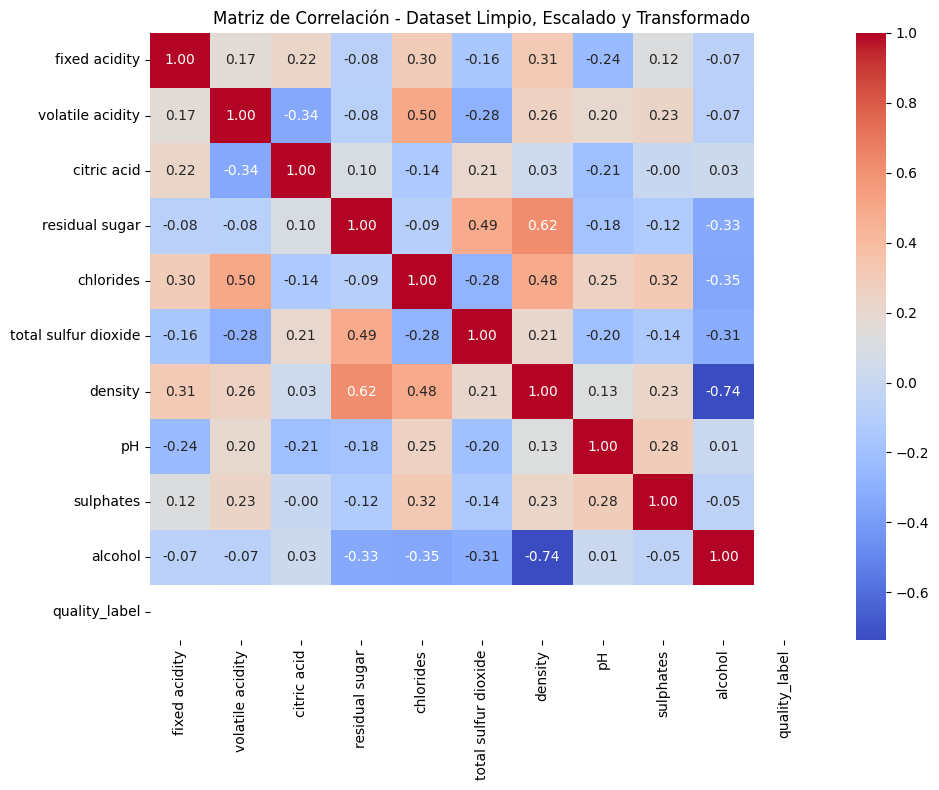


✅ Dataset final limpio y listo para modelar: 2848 registros, 13 columnas


In [58]:
# %% LIMPIEZA DE OUTLIERS Y DEPURACIÓN AVANZADA DEL DATASET

# ==========================================================
# 1️⃣ FUNCIÓN PARA LIMPIAR OUTLIERS CON MÉTODO IQR
# ==========================================================
def limpiar_outliers_iqr(df, columnas=None):
    df_limpio = df.copy()
    if columnas is None:
        columnas = df.select_dtypes(include=[np.number]).columns  # sólo numéricas
    
    print("\n=== DETECCIÓN Y ELIMINACIÓN DE OUTLIERS ===")
    for col in columnas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)]
        print(f"  • {col}: {outliers.shape[0]} outliers detectados")

        # Filtrar valores dentro del rango
        df_limpio = df_limpio[(df_limpio[col] >= lim_inf) & (df_limpio[col] <= lim_sup)]
    
    print(f"\nTamaño antes: {df.shape[0]} → después: {df_limpio.shape[0]}")
    return df_limpio


# ==========================================================
# 2️⃣ APLICAR LA LIMPIEZA DE OUTLIERS
# ==========================================================
num_cols_cls = df_cls.select_dtypes(include=[np.number]).columns
df_cls_clean = limpiar_outliers_iqr(df_cls, num_cols_cls)

print("\n=== DESCRIPCIÓN DEL DATASET LIMPIO ===")
print(df_cls_clean.describe().round(3))


# ==========================================================
# 3️⃣ LIMPIEZA AVANZADA DE VARIABLES
# ==========================================================
print("\n=== LIMPIEZA AVANZADA DE VARIABLES ===")

df = df_cls_clean.copy()

# --- 1. Eliminar columnas redundantes o muy correlacionadas ---
if 'free sulfur dioxide' in df.columns:
    df.drop(columns=['free sulfur dioxide'], inplace=True)
    print("✔️ Columna 'free sulfur dioxide' eliminada por alta correlación con 'total sulfur dioxide'")

# --- 2. Transformaciones logarítmicas en variables sesgadas ---
cols_skewed = ['residual sugar', 'chlorides', 'sulphates']
for col in cols_skewed:
    if col in df.columns:
        df[col] = np.log1p(df[col])
        print(f"✔️ Transformación logarítmica aplicada a '{col}'")

# --- 3. Estandarizar las variables numéricas ---
num_cols = df.select_dtypes(include=[np.number]).columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])
print("✔️ Variables numéricas estandarizadas (media=0, desviación=1)")

# --- 4. Eliminar duplicados residuales ---
dup_count = df.duplicated().sum()
if dup_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"✔️ {dup_count} duplicados eliminados")
else:
    print("✔️ No se encontraron duplicados adicionales")

# --- 5. Verificar correlaciones nuevamente ---
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación - Dataset Limpio, Escalado y Transformado")
plt.tight_layout()
plt.show()

# Dataset final
df_cls_clean_final = df.copy()
print(f"\n✅ Dataset final limpio y listo para modelar: "
      f"{df_cls_clean_final.shape[0]} registros, "
      f"{df_cls_clean_final.shape[1]} columnas")



In [62]:
# %% COMPARACIÓN DE VARIABLES NUMÉRICAS Y CATEGÓRICAS PARA SMOTE
import pandas as pd
from sklearn.preprocessing import LabelEncoder

print("\n=== COMPARACIÓN DE VARIABLES Y DETECCIÓN DE TIPOS ===")

# Copia del dataset limpio final
df = df_cls_clean_final.copy()

# ------------------------------
# 1️⃣ Identificar variable objetivo
# ------------------------------
if 'quality_label' in df.columns:
    target_col = 'quality_label'
    print("🎯 Variable objetivo seleccionada: 'quality_label' (numérica)")
elif 'quality_category' in df.columns:
    target_col = 'quality_category'
    print("🎯 Variable objetivo seleccionada: 'quality_category' (categórica)")
else:
    raise ValueError("⚠️ No se encontró ninguna columna de calidad (quality_label o quality_category)")

# ------------------------------
# 2️⃣ Separar predictoras y target
# ------------------------------
X = df.drop(columns=[target_col])
y = df[target_col]

# ------------------------------
# 3️⃣ Mostrar clases y tipos de variable objetivo
# ------------------------------
print("\n=== CLASES DE LA VARIABLE OBJETIVO ===")
print("Tipo de dato:", y.dtype)
print("Valores únicos:", y.unique())

# Si la variable es texto o categórica, la codificamos para SMOTE
if y.dtype == 'object' or str(y.dtype).startswith('category'):
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    print("\n✔️ La variable objetivo fue codificada numéricamente para SMOTE:")
    print(pd.DataFrame({'Clase original': y.unique(), 'Clase codificada': le.transform(y.unique())}))
else:
    y_encoded = y.copy()
    print("\n✔️ La variable objetivo ya está en formato numérico.")

# ------------------------------
# 4️⃣ Verificar columnas numéricas y categóricas en X
# ------------------------------
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()

print("\n=== VARIABLES NUMÉRICAS ===")
print(num_cols)
print("\n=== VARIABLES CATEGÓRICAS ===")
print(cat_cols if cat_cols else "No hay variables categóricas")

# ------------------------------
# 5️⃣ Convertir categóricas en dummies (OneHotEncoding)
# ------------------------------
if cat_cols:
    print("\n✔️ Se codificarán las variables categóricas con One-Hot Encoding para que SMOTE funcione correctamente.")
    X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
else:
    X_encoded = X.copy()

print(f"\n✅ Dataset preparado: {X_encoded.shape[0]} registros, {X_encoded.shape[1]} columnas")
print(f"Tipo de variable objetivo: {y_encoded.dtype}")

# (Opcional) Mostrar primeras filas
print("\nVista previa de las columnas finales:\n", X_encoded.head(3))


=== COMPARACIÓN DE VARIABLES Y DETECCIÓN DE TIPOS ===
🎯 Variable objetivo seleccionada: 'quality_label' (numérica)

=== CLASES DE LA VARIABLE OBJETIVO ===
Tipo de dato: float64
Valores únicos: [0.]

✔️ La variable objetivo ya está en formato numérico.

=== VARIABLES NUMÉRICAS ===
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

=== VARIABLES CATEGÓRICAS ===
['type', 'quality_category']

✔️ Se codificarán las variables categóricas con One-Hot Encoding para que SMOTE funcione correctamente.

✅ Dataset preparado: 2848 registros, 11 columnas
Tipo de variable objetivo: float64

Vista previa de las columnas finales:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.674120          0.057154    -0.511468        1.386012  -0.191303   
2      -0.218228         -0.028065    -0.799164        0.054858   0.731302   
3      -0.446174         -0.454161     0.3516


=== COMPARACIÓN DE VARIABLES Y DETECCIÓN DE TIPOS ===
🎯 Variable objetivo seleccionada: 'quality_label' (numérica)

=== CLASES DE LA VARIABLE OBJETIVO ===
Tipo de dato: float64
Valores únicos: [0.]

✔️ La variable objetivo ya está en formato numérico.

=== VARIABLES NUMÉRICAS ===
['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']

=== VARIABLES CATEGÓRICAS ===
['type', 'quality_category']

✔️ Se codificarán las variables categóricas con One-Hot Encoding para que SMOTE funcione correctamente.

✅ Dataset preparado: 2848 registros, 11 columnas
Tipo de variable objetivo: float64


C:\Users\dgutierr\AppData\Local\Temp\ipykernel_17048\2852649842.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_encoded, palette="crest")


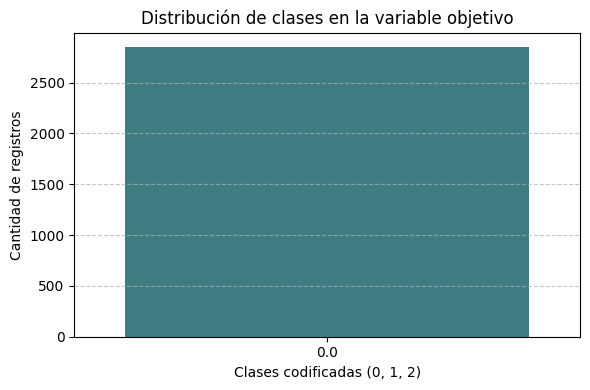


Vista previa de las columnas finales:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.674120          0.057154    -0.511468        1.386012  -0.191303   
2      -0.218228         -0.028065    -0.799164        0.054858   0.731302   
3      -0.446174         -0.454161     0.351618        1.464422   1.218038   

   total sulfur dioxide   density        pH  sulphates   alcohol  type_white  
0              1.491203  1.095646 -0.252763  -0.855828 -0.671600        True  
2              2.142644  0.459552  0.773830   0.882657 -0.764098        True  
3              0.674471  1.656906  2.416378  -0.282732 -0.486604        True  


In [ ]:
# %% COMPARACIÓN DE VARIABLES NUMÉRICAS Y CATEGÓRICAS PARA SMOTE + GRÁFICA

print("\n=== COMPARACIÓN DE VARIABLES Y DETECCIÓN DE TIPOS ===")

# Copia del dataset limpio final
df = df_cls_clean_final.copy()

# ------------------------------
# 1️⃣ Identificar variable objetivo
# ------------------------------
if 'quality_label' in df.columns:
    target_col = 'quality_label'
    print("🎯 Variable objetivo seleccionada: 'quality_label' (numérica)")
elif 'quality_category' in df.columns:
    target_col = 'quality_category'
    print("🎯 Variable objetivo seleccionada: 'quality_category' (categórica)")
else:
    raise ValueError("⚠️ No se encontró ninguna columna de calidad (quality_label o quality_category)")

# ------------------------------
# 2️⃣ Separar predictoras y target
# ------------------------------
X = df.drop(columns=[target_col])
y = df[target_col]

# ------------------------------
# 3️⃣ Mostrar clases y tipos de variable objetivo
# ------------------------------
print("\n=== CLASES DE LA VARIABLE OBJETIVO ===")
print("Tipo de dato:", y.dtype)
print("Valores únicos:", y.unique())

# Si la variable es texto o categórica, la codificamos para SMOTE
if y.dtype == 'object' or str(y.dtype).startswith('category'):
    le = LabelEncoder()
    y_encoded = le.fit_transform(y)
    print("\n✔️ La variable objetivo fue codificada numéricamente para SMOTE:")
    print(pd.DataFrame({'Clase original': y.unique(), 'Clase codificada': le.transform(y.unique())}))
else:
    y_encoded = y.copy()
    print("\n✔️ La variable objetivo ya está en formato numérico.")

# ------------------------------
# 4️⃣ Verificar columnas numéricas y categóricas en X
# ------------------------------
num_cols = X.select_dtypes(include=['number']).columns.tolist()
cat_cols = X.select_dtypes(exclude=['number']).columns.tolist()

print("\n=== VARIABLES NUMÉRICAS ===")
print(num_cols)
print("\n=== VARIABLES CATEGÓRICAS ===")
print(cat_cols if cat_cols else "No hay variables categóricas")

# ------------------------------
# 5️⃣ Convertir categóricas en dummies (OneHotEncoding)
# ------------------------------
if cat_cols:
    print("\n✔️ Se codificarán las variables categóricas con One-Hot Encoding para que SMOTE funcione correctamente.")
    X_encoded = pd.get_dummies(X, columns=cat_cols, drop_first=True)
else:
    X_encoded = X.copy()

print(f"\n✅ Dataset preparado: {X_encoded.shape[0]} registros, {X_encoded.shape[1]} columnas")
print(f"Tipo de variable objetivo: {y_encoded.dtype}")

# ------------------------------
# 6️⃣ Graficar la distribución de clases (antes del balanceo)
# ------------------------------
plt.figure(figsize=(6,4))
sns.countplot(x=y_encoded, palette="crest")
plt.title("Distribución de clases en la variable objetivo")
plt.xlabel("Clases codificadas (0, 1, 2)")
plt.ylabel("Cantidad de registros")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# (Opcional) Mostrar primeras filas
print("\nVista previa de las columnas finales:\n", X_encoded.head(3))

In [49]:

# Visualización de datos

# Identificación de outliers
def detectar_outliers(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    out = df[(df[columna] < Q1 - 1.5*IQR) | (df[columna] > Q3 + 1.5*IQR)]
    return out.shape[0]

print("\n=== OUTLIERS DETECTADOS (Clasificación) ===")
for c in df_cls.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_cls, c)}")
    print("\n=== OUTLIERS DETECTADOS (Regresión) ===")
for c in df_reg.select_dtypes(include=[np.number]).columns:
    print(f"{c}: {detectar_outliers(df_reg, c)}")



=== OUTLIERS DETECTADOS (Clasificación) ===
fixed acidity: 321

=== OUTLIERS DETECTADOS (Regresión) ===
volatile acidity: 339

=== OUTLIERS DETECTADOS (Regresión) ===
citric acid: 448

=== OUTLIERS DETECTADOS (Regresión) ===
residual sugar: 94

=== OUTLIERS DETECTADOS (Regresión) ===
chlorides: 282

=== OUTLIERS DETECTADOS (Regresión) ===
free sulfur dioxide: 48

=== OUTLIERS DETECTADOS (Regresión) ===
total sulfur dioxide: 12

=== OUTLIERS DETECTADOS (Regresión) ===
density: 3

=== OUTLIERS DETECTADOS (Regresión) ===
pH: 63

=== OUTLIERS DETECTADOS (Regresión) ===
sulphates: 166

=== OUTLIERS DETECTADOS (Regresión) ===
alcohol: 3

=== OUTLIERS DETECTADOS (Regresión) ===
quality_label: 1371

=== OUTLIERS DETECTADOS (Regresión) ===
fixed acidity: 314
volatile acidity: 326
citric acid: 460
residual sugar: 110
chlorides: 259
free sulfur dioxide: 55
total sulfur dioxide: 9
density: 3
pH: 66
sulphates: 167
alcohol: 3
quality: 208



=== CORRELACIÓN ENTRE VARIABLES (SIN OUTLIERS) ===

=== MATRIZ DE CORRELACIÓN (Clasificación) ===
                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                 1.000             0.173        0.215   
volatile acidity              0.173             1.000       -0.334   
citric acid                   0.215            -0.334        1.000   
residual sugar               -0.076            -0.131        0.116   
chlorides                     0.292             0.497       -0.147   
free sulfur dioxide          -0.168            -0.299        0.162   
total sulfur dioxide         -0.151            -0.294        0.212   
density                       0.299             0.231        0.033   
pH                           -0.230             0.205       -0.206   
sulphates                     0.131             0.216        0.006   
alcohol                      -0.066            -0.059        0.026   
quality_label                   NaN               NaN        

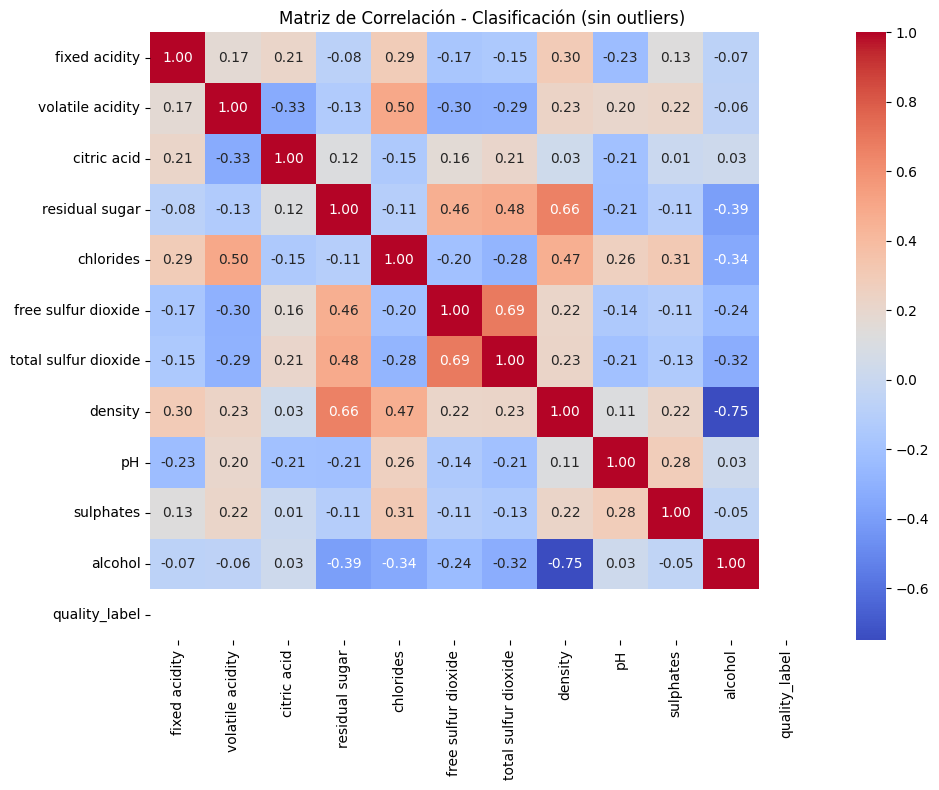

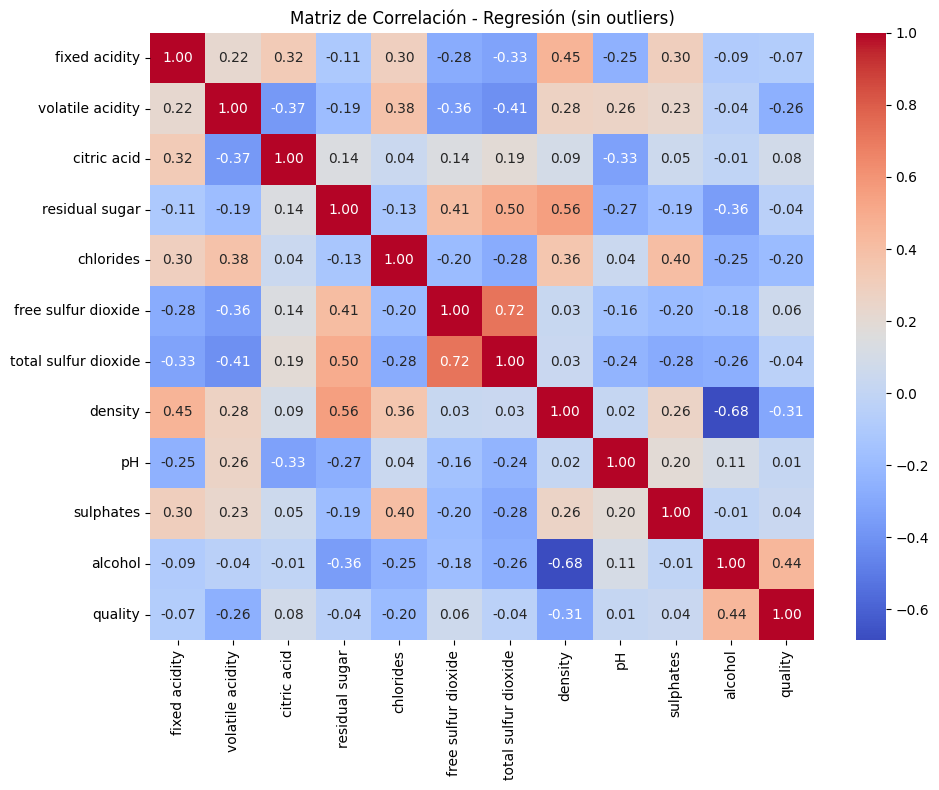


=== CORRELACIONES FUERTES (Clasificación) |r| > 0.5 ===
total sulfur dioxide ↔ free sulfur dioxide: 0.69
residual sugar ↔ density: 0.66
density ↔ alcohol: -0.75

=== CORRELACIONES FUERTES (Regresión) |r| > 0.5 ===
total sulfur dioxide ↔ free sulfur dioxide: 0.72
residual sugar ↔ density: 0.56
density ↔ alcohol: -0.68


In [53]:
# %% CORRELACIÓN ENTRE VARIABLES (usando datasets limpios)
print("\n=== CORRELACIÓN ENTRE VARIABLES (SIN OUTLIERS) ===")

# Usar df_*_clean si existe; si no, usar df_* original
_df_cls = globals().get("df_cls_clean", df_cls)
_df_reg = globals().get("df_reg_clean", df_reg)

print("\n=== MATRIZ DE CORRELACIÓN (Clasificación) ===")
corr_cls = _df_cls.corr(numeric_only=True)
print(corr_cls.round(3))

print("\n=== MATRIZ DE CORRELACIÓN (Regresión) ===")
corr_reg = _df_reg.corr(numeric_only=True)
print(corr_reg.round(3))

# Visualización de matrices de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_cls, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación - Clasificación (sin outliers)')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_reg, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación - Regresión (sin outliers)')
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes (positivas o negativas) |r| > 0.5
def correlaciones_fuertes(corr_mat, umbral=0.5):
    pairs = (
        corr_mat.unstack()
        .dropna()
        .sort_values(ascending=False)
    )
    # quitar diagonales (=1) y duplicados simétricos (A-B y B-A)
    pares_filtrados = []
    vistos = set()
    for (a, b), v in pairs.items():
        if a == b:
            continue
        key = tuple(sorted([a, b]))
        if key in vistos:
            continue
        vistos.add(key)
        if abs(v) > umbral:
            pares_filtrados.append((a, b, float(v)))
    return pares_filtrados

print("\n=== CORRELACIONES FUERTES (Clasificación) |r| > 0.5 ===")
for a, b, v in correlaciones_fuertes(corr_cls, 0.5):
    print(f"{a} ↔ {b}: {v:.2f}")

print("\n=== CORRELACIONES FUERTES (Regresión) |r| > 0.5 ===")
for a, b, v in correlaciones_fuertes(corr_reg, 0.5):
    print(f"{a} ↔ {b}: {v:.2f}")

In [54]:
print("\n=== PREPARACIÓN DE DATOS PARA MODELADO ===")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Copias de los datasets originales
data_cls = df_cls.copy()
data_reg = df_reg.copy()

# --- 1. Eliminación de duplicados y valores nulos ---
data_cls.drop_duplicates(inplace=True)
data_reg.drop_duplicates(inplace=True)
data_cls.dropna(inplace=True)
data_reg.dropna(inplace=True)

print(f"Dataset Clasificación limpio: {data_cls.shape[0]} filas, {data_cls.shape[1]} columnas")
print(f"Dataset Regresión limpio: {data_reg.shape[0]} filas, {data_reg.shape[1]} columnas")

# --- 2. Separar variables predictoras (X) y objetivo (y) ---
# Ajusta el nombre de la columna objetivo según tu dataset (por ejemplo 'quality' o 'target')
target_cls = 'quality_label'  # <-- cambia si es necesario
target_reg = 'quality'  # <-- cambia si es necesario

X_cls = data_cls.drop(columns=[target_cls])
y_cls = data_cls[target_cls]

X_reg = data_reg.drop(columns=[target_reg])
y_reg = data_reg[target_reg]

# --- 3. Codificación de variables categóricas (si existen) ---
cat_cols_cls = X_cls.select_dtypes(include=['object']).columns
cat_cols_reg = X_reg.select_dtypes(include=['object']).columns

if len(cat_cols_cls) > 0:
    print(f"Codificando variables categóricas (Clasificación): {list(cat_cols_cls)}")
    X_cls = pd.get_dummies(X_cls, columns=cat_cols_cls, drop_first=True)

if len(cat_cols_reg) > 0:
    print(f"Codificando variables categóricas (Regresión): {list(cat_cols_reg)}")
    X_reg = pd.get_dummies(X_reg, columns=cat_cols_reg, drop_first=True)

# --- 4. Escalado de variables numéricas ---
scaler = StandardScaler()

X_cls_scaled = scaler.fit_transform(X_cls)
X_reg_scaled = scaler.fit_transform(X_reg)

print("Variables numéricas escaladas correctamente.")

# --- 5. División en entrenamiento y prueba ---
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_cls_scaled, y_cls, test_size=0.3, random_state=42, stratify=y_cls)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg_scaled, y_reg, test_size=0.3, random_state=42)

print("Conjuntos de entrenamiento y prueba creados exitosamente.")
print(f"Clasificación -> Entrenamiento: {X_train_cls.shape}, Prueba: {X_test_cls.shape}")
print(f"Regresión -> Entrenamiento: {X_train_reg.shape}, Prueba: {X_test_reg.shape}")


=== PREPARACIÓN DE DATOS PARA MODELADO ===
Dataset Clasificación limpio: 4877 filas, 14 columnas
Dataset Regresión limpio: 4878 filas, 13 columnas
Codificando variables categóricas (Clasificación): ['type', 'quality_category']
Codificando variables categóricas (Regresión): ['type']
Variables numéricas escaladas correctamente.
Conjuntos de entrenamiento y prueba creados exitosamente.
Clasificación -> Entrenamiento: (3413, 14), Prueba: (1464, 14)
Regresión -> Entrenamiento: (3414, 12), Prueba: (1464, 12)


In [55]:
# %% BAYESIAN OPTIMIZATION + SMOTE (Clasificación)
# (si te falta, instala antes: pip install scikit-optimize imbalanced-learn)

from skopt import BayesSearchCV
from skopt.space import Integer, Categorical
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, make_scorer
import joblib
import numpy as np
import pandas as pd

print("\n=== BÚSQUEDA BAYESIANA CON SMOTE POR FOLD (Clasificación) ===")

# ---------- 1) Datos de partida (X/y) ----------
target_cls = "quality_label"
X_cls_bayes = data_cls.drop(columns=[target_cls])
y_cls_bayes = data_cls[target_cls]

# Columnas numéricas y categóricas
num_cols = X_cls_bayes.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X_cls_bayes.select_dtypes(include=["object"]).columns.tolist()   # 'type'

# ---------- 2) Preprocesador (ColumnTransformer) ----------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cat_cols)
    ],
    remainder="drop"
)

# ---------- 3) Pipeline: Preprocesado -> SMOTE -> RandomForest ----------
pipe = Pipeline(steps=[
    ("prep", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("clf", RandomForestClassifier(random_state=42, n_jobs=-1))
])

# ---------- 4) Espacio de búsqueda bayesiana ----------
search_space = {
    "clf__n_estimators": Integer(150, 600),
    "clf__max_depth": Integer(5, 30),
    "clf__min_samples_split": Integer(2, 12),
    "clf__min_samples_leaf": Integer(1, 6),
    "clf__max_features": Categorical(["sqrt", "log2"]),
    "clf__class_weight": Categorical([None, "balanced"]),  # opcional
    "smote__k_neighbors": Integer(3, 7)                    # balanceo por fold
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scorer = make_scorer(f1_score, average="macro")

opt = BayesSearchCV(
    estimator=pipe,
    search_spaces=search_space,
    n_iter=45,                 # 40–60 suele ser suficiente
    scoring=scorer,
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=2
)

# ---------- 5) Entrenamiento (usa tu split de train, si ya lo tienes) ----------
# Si ya creaste X_train_cls / y_train_cls con stratify, úsalo:
opt.fit(X_cls_bayes, y_cls_bayes)   # o .fit(X_train_original, y_train_cls)

print("\n✅ Búsqueda completada")
print("Mejor F1-Macro (CV):", round(opt.best_score_, 4))
print("Mejores hiperparámetros:", opt.best_params_)

# ---------- 6) Evaluación en tu hold-out (si ya tienes X_test_cls/y_test_cls escalados NO los uses aquí)
# Genera un hold-out coherente con el pipeline (sin transformar previamente):
from sklearn.model_selection import train_test_split
Xtr, Xte, ytr, yte = train_test_split(
    X_cls_bayes, y_cls_bayes, test_size=0.3, random_state=42, stratify=y_cls_bayes
)

best_model = opt.best_estimator_
y_pred = best_model.predict(Xte)

print("\n--- RESULTADOS EN HOLD-OUT ---")
print(classification_report(yte, y_pred))
print("Matriz de confusión:\n", pd.DataFrame(confusion_matrix(yte, y_pred)))

# ---------- 7) Guardar el mejor modelo ----------
import os
os.makedirs("modelos", exist_ok=True)
joblib.dump(best_model, "modelos/modelo_clasificacion_vino_bayes.pkl")
print("\n💾 Guardado: modelos/modelo_clasificacion_vino_bayes.pkl")



=== BÚSQUEDA BAYESIANA CON SMOTE POR FOLD (Clasificación) ===
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 